In [259]:
#Librerías
import pandas as pd
from bs4 import BeautifulSoup
import requests
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import bigrams

In [260]:
stopw=stopwords.words('spanish')
#Extender la lista de stopwords
palabras=["mil", "millones"]
stopw.extend(palabras)

In [261]:
#Extraccion de texto de la pagina
url = 'https://www.gob.mx/presidencia/articulos/version-estenografica-4-informe-de-gobierno?idiom=es'
html = requests.get(url).content
soup = BeautifulSoup(html, 'lxml')
texto = soup.find_all('p')
texto = [t.text for t in texto]
texto = ' '.join(texto)

In [262]:
#Seleccionar palabras
final=texto[691:25000]
#Limpiar texto
final = ' '.join([word for word in final.split() if word not in stopw])
#Eliminar signos de puntuación
final = final.replace('.','')
final = final.replace(',','')
final = final.replace('(','')
final = final.replace(')','')
final = final.replace(':','')
final = final.replace(';','')
final = final.replace('“','')
final = final.replace('”','')
final = final.replace('—','')
final = final.replace('¿','')
final = final.replace('?','')
final = final.replace('!','')
final = final.replace('¡','')
final = final.replace('…','')
final = final.replace('–','')
final = final.replace('«','')
final = final.replace('»','')
#Texto en minuscúlas
final = final.lower()
#Eliminar espacios
final = final.replace('  ',' ')
#Eliminar números
final = ''.join([i for i in final if not i.isdigit()])

In [263]:
#Construir bigramas

bigramas = list(bigrams(final.split()))

#Obtener frecuencia de bigramas
from nltk import FreqDist
frecuencia = FreqDist(bigramas)

#Frecuencia como lista
frecuencia = pd.DataFrame(frecuencia.most_common(30), columns=['bigrama', 'frecuencia'])

#Obtener probabilidad de bigramas
frecuencia['probabilidad'] = frecuencia['frecuencia']/sum(frecuencia['frecuencia'])
#Dejar probabilidad y bigrama
frecuencia = frecuencia[['bigrama', 'probabilidad']]

In [264]:
frecuencia

,bigrama,probabilidad
0,"(año, próximo)",0.0750
1,"(programas, bienestar)",0.0500
2,"(crecimiento, económico)",0.0500
3,"(secretaría, defensa)",0.0500
4,"(amigas, amigos)",0.0375
5,"(servidores, públicos)",0.0375
6,"(adultos, mayores)",0.0375
7,"(mismo, periodo)",0.0375
8,"(año, pasado)",0.0375
9,"(comisión, federal)",0.0375


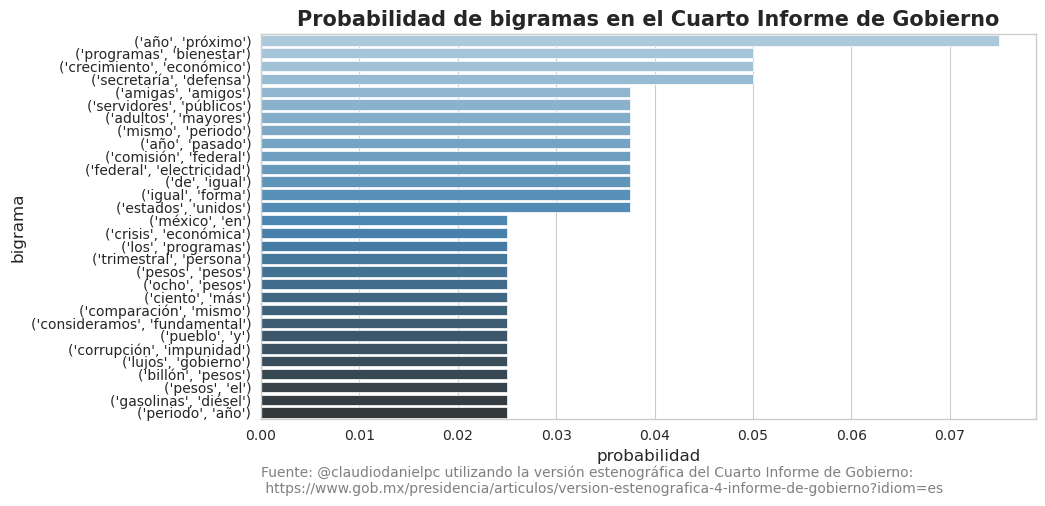

In [265]:
#graficar probabilidad de bigramas

plt.rcParams["font.family"]="Montserrat"

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.title('Probabilidad de bigramas en el Cuarto Informe de Gobierno', fontweight='bold', fontsize=15)
sns.barplot(x='probabilidad', y='bigrama', data=frecuencia, palette='Blues_d')
#Añadir fuente de datos
plt.text(0, -0.2, 'Fuente: @claudiodanielpc utilizando la versión estenográfica del Cuarto Informe de Gobierno:\n https://www.gob.mx/presidencia/articulos/version-estenografica-4-informe-de-gobierno?idiom=es', fontsize=10, color='gray', ha='left', va='bottom', transform=plt.gca().transAxes)

#Guardar imagen
plt.savefig('bigramas.png', dpi=300, bbox_inches='tight')

plt.show()

